# Logistic Regression

Logistic regression is a go-to model for many binary classification problems — where your target variable is either 0 or 1 (like yes/no, true/false, win/lose).

| Situation                                           | Why It's a Good Fit                                                         |
| --------------------------------------------------- | --------------------------------------------------------------------------- |
| 🔢 **Target is binary** (0/1)                       | Logistic regression models the **probability** of being class 1             |
| 📈 **You want interpretable results**               | The model gives **coefficients** showing how each feature affects the odds  |
| ⚖️ **Classes are reasonably balanced**              | Works best when there’s not extreme class imbalance                         |
| 🔍 **You care about probabilities**                 | It outputs not just labels, but **confidence levels** (via `predict_proba`) |
| 📊 **Input features are numeric or can be encoded** | Works well with scaled/encoded features                                     |
| ⚡ **You want a fast, simple baseline model**        | It’s fast, especially useful for early exploration or large datasets        |


| Situation                             | Better Alternatives                                          |
| ------------------------------------- | ------------------------------------------------------------ |
| 🧪 Complex nonlinear patterns         | Try **decision trees**, **SVM**, or **neural networks**      |
| 🔁 Multiclass targets (more than 2)   | Use **softmax logistic regression** or **other classifiers** |
| 🧍 Highly imbalanced classes          | Try **SMOTE**, **class weights**, or **tree-based models**   |
| 🔗 Strong interactions or hierarchies | Tree models or ensemble methods handle this better           |


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
# Load dataset
data = load_breast_cancer()
data


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = malignant, 1 = benign

In [4]:
X.sample(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
260,20.31,27.06,132.90,1288.0,0.1000,0.1088,0.15190,0.09333,0.1814,0.05572,...,24.33,39.16,162.30,1844.0,0.1522,0.2945,0.3788,0.1697,0.3151,0.07999
208,13.11,22.54,87.02,529.4,0.1002,0.1483,0.08705,0.05102,0.1850,0.07310,...,14.55,29.16,99.48,639.3,0.1349,0.4402,0.3162,0.1126,0.4128,0.10760


In [5]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
# Train logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Predict labels using default threshold (0.5)
y_pred = logreg.predict(X_test)

In [9]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]  # Probabilities for class 1

| Method            | What it does                                | Output                                | When to use                                                |
| ----------------- | ------------------------------------------- | ------------------------------------- | ---------------------------------------------------------- |
| `predict()`       | Predicts the **final class label**          | Returns `0` or `1`                    | When you just need the classification result               |
| `predict_proba()` | Predicts the **probability for each class** | Returns something like `[0.12, 0.88]` | When you want confidence scores or to customize thresholds |


| Goal                            | Use               |
| ------------------------------- | ----------------- |
| Just get predicted labels       | `predict()`       |
| Get confidence/probability      | `predict_proba()` |
| Evaluate model (ROC, AUC, etc.) | `predict_proba()` |


In [11]:
# Compare the first 5 predictions
for i in range(5):
    print(f"Sample {i+1}:")
    print(f"  True label:       {y_test[i]}")
    print(f"  Predicted label:  {y_pred[i]}")
    print(f"  Probability of 1: {y_pred_probs[i]:.4f}")
    print("---")

Sample 1:
  True label:       1
  Predicted label:  1
  Probability of 1: 0.8613
---
Sample 2:
  True label:       0
  Predicted label:  0
  Probability of 1: 0.0000
---
Sample 3:
  True label:       0
  Predicted label:  0
  Probability of 1: 0.0018
---
Sample 4:
  True label:       1
  Predicted label:  1
  Probability of 1: 0.9987
---
Sample 5:
  True label:       1
  Predicted label:  1
  Probability of 1: 0.9998
---


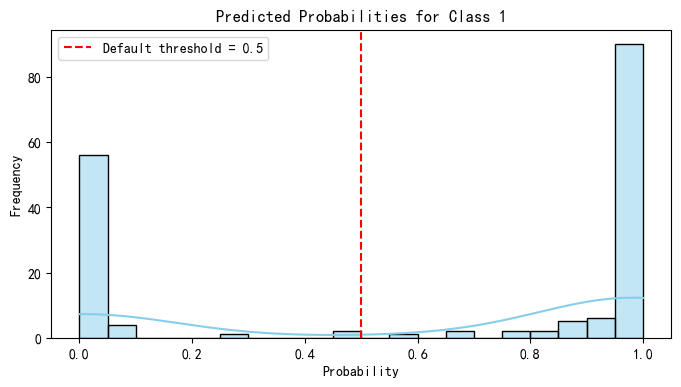

In [ ]:
# Visualize predicted probabilities
plt.figure(figsize=(8, 4))
sns.histplot(y_pred_probs, bins=20, kde=True, color="skyblue")
plt.axvline(0.5, color='red', linestyle='--', label='Default threshold = 0.5')
plt.title("Predicted Probabilities for Class 1")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
# Create binary target: 1 if sales > 15, else 0
# sales_df["high_sales"] = (sales_df["sales"] > 15).astype(int)

- ROC Curve: shows the trade-off between sensitivity (TPR) and specificity (1 - FPR) at different thresholds
- AUC (Area Under Curve): a higher score (closer to 1) means better model performance
    - 0.5 = random guessing
    - \> 0.7 = good
    - \> 0.9 = excellent


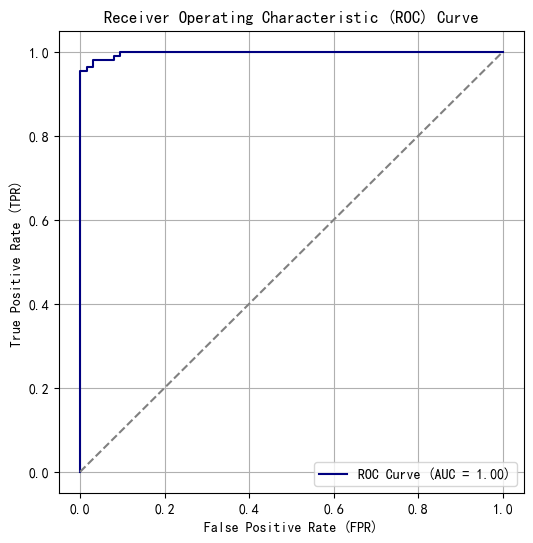

In [14]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Compute AUC
auc_score = roc_auc_score(y_test, y_pred_probs)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()


| Metric                  | Meaning                                     |
| ----------------------- | ------------------------------------------- |
| `accuracy_score`        | Overall how many predictions were correct   |
| `confusion_matrix`      | Shows TP, FP, TN, FN breakdown              |
| `classification_report` | Gives precision, recall, F1-score per class |


In [15]:
# Accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report (includes precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy Score: 0.9766081871345029

Confusion Matrix:
[[ 61   2]
 [  2 106]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



| Metric        | Prioritize When...                                                               | Example Scenarios                                                                                                 |
| ------------- | -------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------- |
| **Precision** | You care more about avoiding **false positives** (wrong positive predictions)    | - Spam detection: Don’t mark important emails as spam  <br> - Fraud detection: Avoid falsely flagging legit users |
| **Recall**    | You care more about catching **all true positives**, even if some are wrong      | - Disease screening: Better to catch all sick patients <br> - Security alerts: Catch all real threats             |
| **F1-score**  | You want a **balance between precision and recall**                              | - General binary classification with uneven class distribution <br> - Text classification, NLP tasks              |
| **Accuracy**  | Classes are **balanced**, and both false positives/negatives are equally costly  | - Predicting pass/fail when pass/fail are 50/50 <br> - Quality control in consistent datasets                     |
| **Support**   | Not a performance metric — just tells you how many samples of each class you had | Helps you know which class is underrepresented                                                                    |


| Goal                          | Metric to prioritize |
| ----------------------------- | -------------------- |
| Avoid false alarms            | Precision            |
| Catch all true cases          | Recall               |
| Balance both (e.g. fairness)  | F1-score             |
| Just want overall correctness | Accuracy             |
